In [17]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline
import pickle

In [4]:
recipes = pd.read_csv('recipes_muffins_cupcakes.csv')

In [5]:
#show table
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


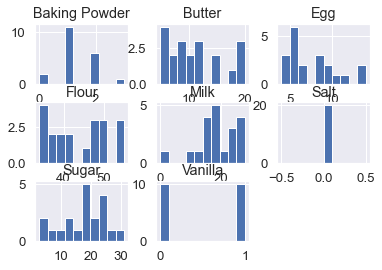

In [14]:
recipes.hist()


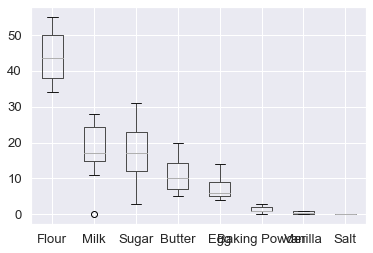

In [15]:
recipes.boxplot()

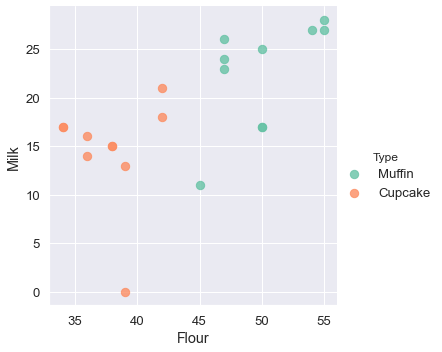

In [51]:
#plotting the data
sns.lmplot('Flour', 'Milk', data=recipes, hue='Type',
           palette='Set2', fit_reg=False, scatter_kws={"s": 70});

In [34]:
ingredients = recipes[['Flour','Milk']].values
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [35]:
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(kernel='linear')

In [63]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

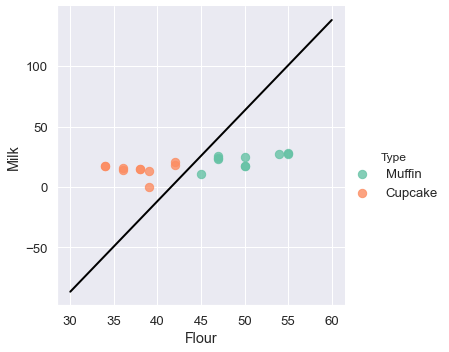

In [64]:
sns.lmplot('Flour', 'Milk', data=recipes, hue='Type', palette='Set2', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

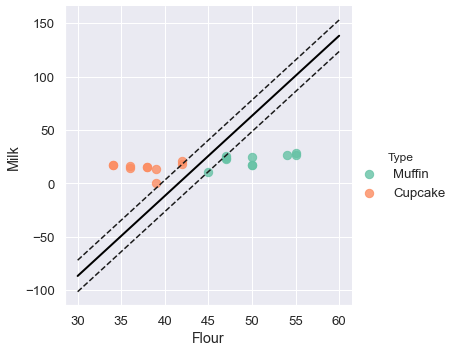

In [53]:
# Look at the margins and support vectors
sns.lmplot('Flour', 'Milk', data=recipes, hue='Type', palette='Set2', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [40]:
# Program untuk prediksi data baru

def recipe_predictor(flour, milk):
    if(model.predict([[flour, milk]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [49]:
recipe_predictor(40,17)

You're looking at a cupcake recipe!


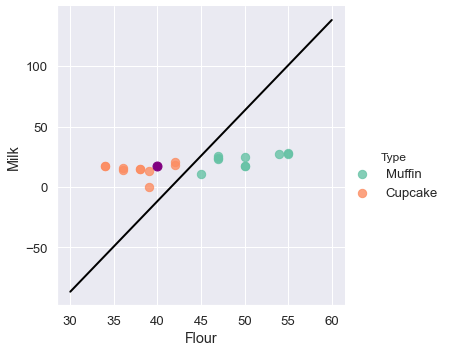

In [60]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Milk', data=recipes, hue='Type', palette='Set2', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(40, 17, 'yo', color='purple', markersize='9');